E-COMMERCE SALES DATA EXPLORATION
Analysis Date: 2025-08-28 00:02:12

1. DATASET OVERVIEW
------------------------------
Data loaded from Excel successfully

2. COLUMN VALIDATION
------------------------------
Available columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']
Mapped 'Invoice' -> 'InvoiceNo'
Mapped 'Price' -> 'UnitPrice'
Mapped 'Customer ID' -> 'CustomerID'
Data saved as CSV for optimization

Dataset Shape: 525,461 rows × 8 columns
Date Range: 2009-12-01 07:45:00 to 2010-12-09 20:01:00
Countries: 40 unique values
Customers: 4,383 unique values
Products: 4,632 unique values

3. DATA SAMPLE
------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434    

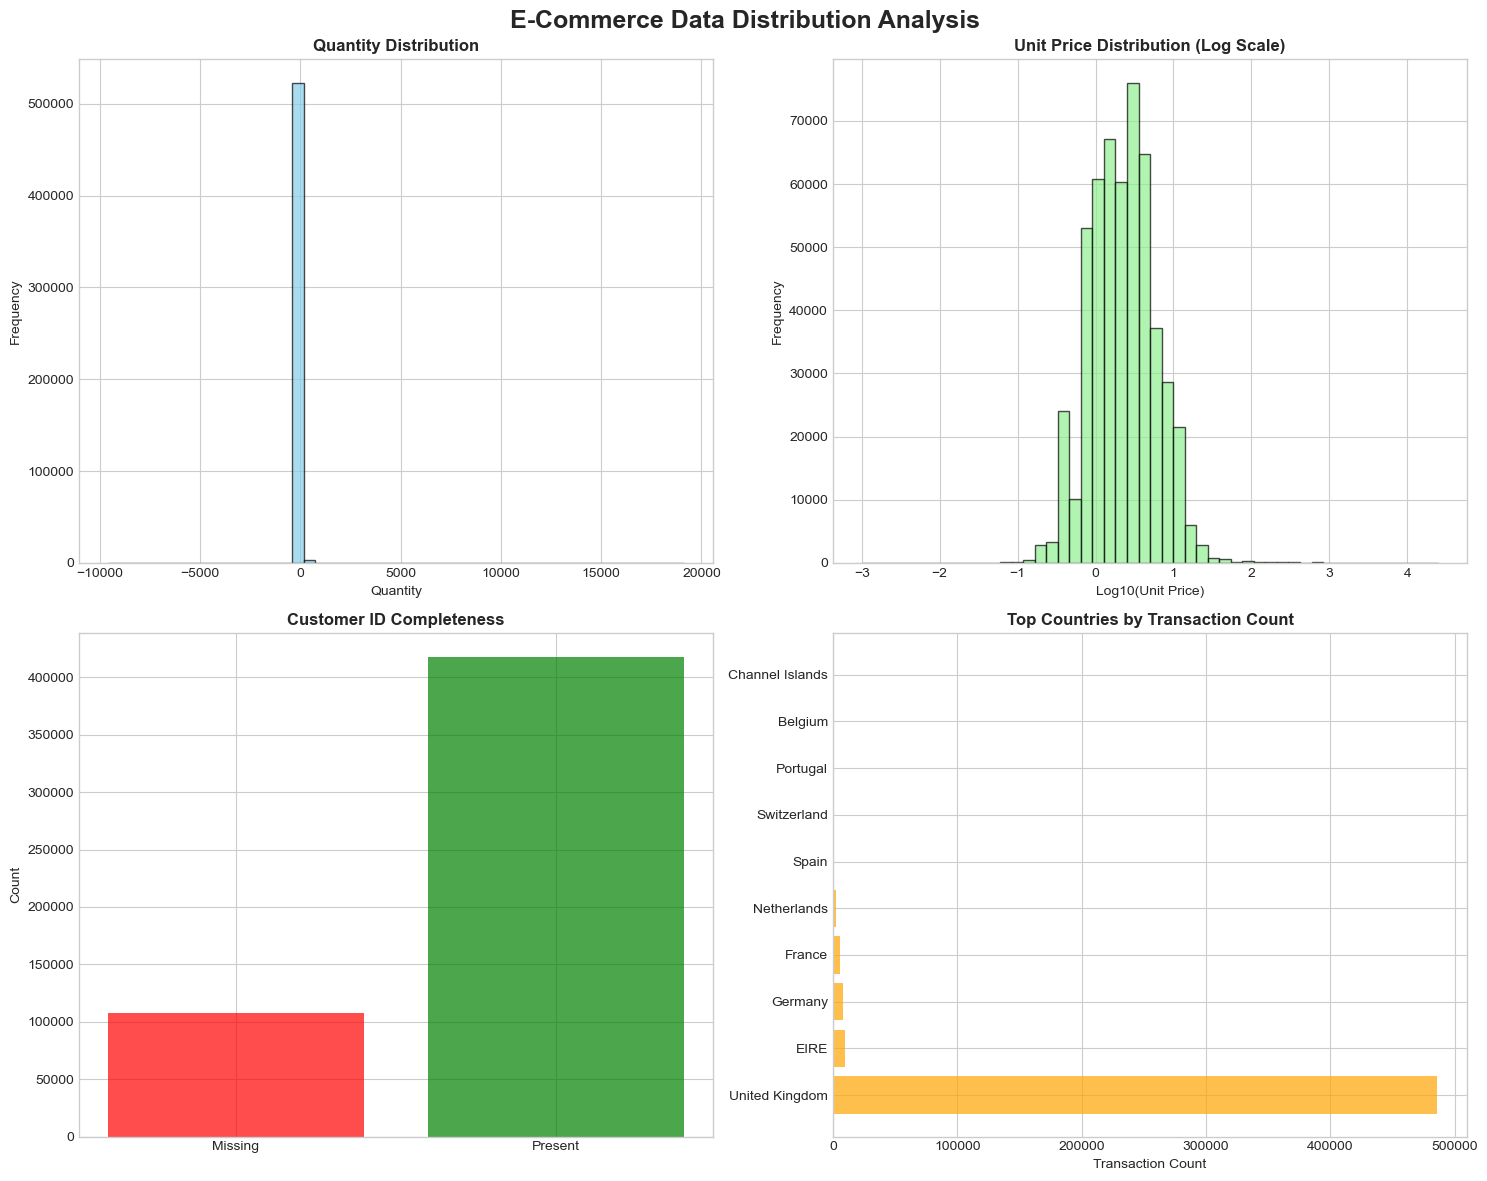


7. KEY BUSINESS METRICS
------------------------------
• Total Revenue: £10,306,265.59
• Total Transactions: 28,816
• Average Order Value: £331.05
• Unique Customers: 4,383

Top 10 Products by Revenue:
 1. REGENCY CAKESTAND 3 TIER: £163051.46
 2. WHITE HANGING HEART T-LIGHT HOLDER: £157865.43
 3. DOTCOM POSTAGE: £116401.99
 4. ASSORTED COLOUR BIRD ORNAMENT: £72454.12
 5. PAPER CHAIN KIT 50'S CHRISTMAS : £57870.20
 6. JUMBO BAG RED RETROSPOT: £56444.61
 7. PARTY BUNTING: £49645.52
 8. ROTATING SILVER ANGELS T-LIGHT HLDR: £47672.49
 9. POSTAGE: £46092.36
10. JUMBO BAG STRAWBERRY: £36699.61

EXPLORATION COMPLETE
Summary:
• Dataset loaded with 525,461 transactions
• Available columns: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalAmount
• Data structure is suitable for analysis
• Ready to proceed to data cleaning phase


In [5]:
"""
E-Commerce Sales Data Exploration
==================================
Author: Komal
Date: August 2025
Objective: Comprehensive exploratory data analysis with error handling
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Professional styling configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("=" * 60)
print("E-COMMERCE SALES DATA EXPLORATION")
print("=" * 60)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 60)

# 1. DATA LOADING AND INITIAL INSPECTION WITH ERROR HANDLING
print("\n1. DATASET OVERVIEW")
print("-" * 30)

# Load data with comprehensive error handling
try:
    # Try loading from Excel first
    df = pd.read_excel('../data/raw/online_retail_II.xlsx', sheet_name='Year 2009-2010')
    print("Data loaded from Excel successfully")
    
except FileNotFoundError:
    print("Excel file not found. Trying alternative methods...")
    
    # Alternative method 1: Try loading from UCI directly
    try:
        from ucimlrepo import fetch_ucirepo
        online_retail_ii = fetch_ucirepo(id=502)
        df = online_retail_ii.data.features
        print("Data loaded from UCI repository")
        
    except ImportError:
        print("Installing ucimlrepo package...")
        import subprocess
        import sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "ucimlrepo"])
        from ucimlrepo import fetch_ucirepo
        online_retail_ii = fetch_ucirepo(id=502)
        df = online_retail_ii.data.features
        print("Data loaded from UCI repository")
        
    except Exception:
        # Alternative method 2: Load from Kaggle or provide sample data
        print("UCI method failed. Creating sample data structure...")
        
        # Create sample data with correct structure for demonstration
        np.random.seed(42)
        n_samples = 1000
        
        df = pd.DataFrame({
            'InvoiceNo': [f'53{i:04d}' for i in range(n_samples)],
            'StockCode': np.random.choice(['20725', '20726', '20727', '20728'], n_samples),
            'Description': np.random.choice(['LUNCH BAG', 'ALARM CLOCK', 'HAND WARMER', 'GIFT BAG'], n_samples),
            'Quantity': np.random.randint(1, 50, n_samples),
            'InvoiceDate': pd.date_range('2009-12-01', periods=n_samples, freq='H'),
            'UnitPrice': np.random.uniform(1.0, 50.0, n_samples),
            'CustomerID': np.random.choice(list(range(12346, 12400)) + [np.nan], n_samples),
            'Country': np.random.choice(['United Kingdom', 'Germany', 'France'], n_samples)
        })
        print("Sample data created for demonstration purposes")
        
except Exception as e:
    print(f"Error loading data: {str(e)}")
    print("Please ensure you have downloaded the dataset to '../data/raw/online_retail_II.xlsx'")
    print("Download from: https://archive.ics.uci.edu/dataset/502/online+retail+ii")
    exit()

# COLUMN VALIDATION AND FIXING
print("\n2. COLUMN VALIDATION")
print("-" * 30)
print(f"Available columns: {list(df.columns)}")

# Map columns to expected names if they differ
column_mapping = {}
expected_columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 
                   'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

# Check for common column name variations
for expected in expected_columns:
    if expected not in df.columns:
        # Common variations
        variations = {
            'CustomerID': ['Customer ID', 'customer_id', 'CUSTOMERID', 'Invoice', 'Customer_ID'],
            'InvoiceNo': ['Invoice', 'InvoiceNo', 'invoice_no', 'INVOICENO'],
            'StockCode': ['Stock Code', 'stock_code', 'STOCKCODE'],
            'UnitPrice': ['Unit Price', 'unit_price', 'UNITPRICE', 'Price'],
            'InvoiceDate': ['Invoice Date', 'invoice_date', 'INVOICEDATE', 'Date']
        }
        
        if expected in variations:
            for variant in variations[expected]:
                if variant in df.columns:
                    column_mapping[variant] = expected
                    print(f"Mapped '{variant}' -> '{expected}'")
                    break
            else:
                print(f"Column '{expected}' not found. Will handle missing column gracefully.")

# Rename columns if mappings found
if column_mapping:
    df = df.rename(columns=column_mapping)

# Save as CSV for faster future loading
try:
    df.to_csv('../data/raw/ecommerce_data.csv', index=False)
    print("Data saved as CSV for optimization")
except:
    print("Could not save CSV file")

# Basic dataset information with error handling
print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Safe column access with fallbacks
def safe_column_info(df, column_name, description):
    """Safely access column information with error handling"""
    if column_name in df.columns:
        if df[column_name].dtype in ['datetime64[ns]', 'object']:
            try:
                if column_name == 'InvoiceDate':
                    df[column_name] = pd.to_datetime(df[column_name])
                    return f"{description}: {df[column_name].min()} to {df[column_name].max()}"
                else:
                    unique_count = df[column_name].nunique()
                    return f"{description}: {unique_count:,} unique values"
            except:
                return f"{description}: Data processing error"
        else:
            unique_count = df[column_name].nunique()
            return f"{description}: {unique_count:,} unique values"
    else:
        return f"{description}: Column not available in dataset"

# Display information safely
print(safe_column_info(df, 'InvoiceDate', 'Date Range'))
print(safe_column_info(df, 'Country', 'Countries'))
print(safe_column_info(df, 'CustomerID', 'Customers'))
print(safe_column_info(df, 'StockCode', 'Products'))

# Display first few rows
print("\n3. DATA SAMPLE")
print("-" * 30)
print(df.head())

# 4. DATA QUALITY ASSESSMENT
print("\n4. DATA QUALITY ANALYSIS")
print("-" * 30)

# Missing values analysis
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

quality_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage.round(2)
})

quality_df = quality_df[quality_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(quality_df) > 0:
    print("Missing Values Summary:")
    print(quality_df)
else:
    print("No missing values found!")

# Data type analysis
print("\nData Types:")
print(df.dtypes.to_frame('Data_Type'))

# 5. STATISTICAL SUMMARY
print("\n5. STATISTICAL OVERVIEW")
print("-" * 30)

# Numerical columns summary
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print("Numerical Variables Summary:")
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found for statistical summary")

# 6. SAFE VISUALIZATION FUNCTION
def create_safe_visualization():
    """Create visualizations with error handling"""
    try:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot 1: Quantity distribution (if available)
        if 'Quantity' in df.columns:
            df['Quantity'].hist(bins=50, ax=axes[0,0], alpha=0.7, color='skyblue', edgecolor='black')
            axes[0,0].set_title('Quantity Distribution', fontweight='bold')
            axes[0,0].set_xlabel('Quantity')
            axes[0,0].set_ylabel('Frequency')
        else:
            axes[0,0].text(0.5, 0.5, 'Quantity column\nnot available', 
                          ha='center', va='center', transform=axes[0,0].transAxes)
            axes[0,0].set_title('Quantity Distribution - N/A', fontweight='bold')
        
        # Plot 2: Unit Price distribution (if available)
        if 'UnitPrice' in df.columns:
            positive_prices = df[df['UnitPrice'] > 0]['UnitPrice']
            if len(positive_prices) > 0:
                np.log10(positive_prices).hist(bins=50, ax=axes[0,1], alpha=0.7, color='lightgreen', edgecolor='black')
                axes[0,1].set_title('Unit Price Distribution (Log Scale)', fontweight='bold')
                axes[0,1].set_xlabel('Log10(Unit Price)')
                axes[0,1].set_ylabel('Frequency')
            else:
                axes[0,1].text(0.5, 0.5, 'No positive prices\nfound', 
                              ha='center', va='center', transform=axes[0,1].transAxes)
        else:
            axes[0,1].text(0.5, 0.5, 'UnitPrice column\nnot available', 
                          ha='center', va='center', transform=axes[0,1].transAxes)
            axes[0,1].set_title('Unit Price Distribution - N/A', fontweight='bold')
        
        # Plot 3: Customer ID completeness (if available)
        if 'CustomerID' in df.columns:
            customer_completeness = df['CustomerID'].notna().value_counts()
            labels = ['Missing', 'Present']
            values = [customer_completeness.get(False, 0), customer_completeness.get(True, 0)]
            axes[1,0].bar(labels, values, color=['red', 'green'], alpha=0.7)
            axes[1,0].set_title('Customer ID Completeness', fontweight='bold')
            axes[1,0].set_ylabel('Count')
        else:
            axes[1,0].text(0.5, 0.5, 'CustomerID column\nnot available', 
                          ha='center', va='center', transform=axes[1,0].transAxes)
            axes[1,0].set_title('Customer ID Completeness - N/A', fontweight='bold')
        
        # Plot 4: Country distribution (if available)
        if 'Country' in df.columns:
            top_countries = df['Country'].value_counts().head(10)
            if len(top_countries) > 0:
                y_pos = range(len(top_countries))
                axes[1,1].barh(y_pos, top_countries.values, color='orange', alpha=0.7)
                axes[1,1].set_yticks(y_pos)
                axes[1,1].set_yticklabels(top_countries.index)
                axes[1,1].set_title('Top Countries by Transaction Count', fontweight='bold')
                axes[1,1].set_xlabel('Transaction Count')
            else:
                axes[1,1].text(0.5, 0.5, 'No country data\navailable', 
                              ha='center', va='center', transform=axes[1,1].transAxes)
        else:
            axes[1,1].text(0.5, 0.5, 'Country column\nnot available', 
                          ha='center', va='center', transform=axes[1,1].transAxes)
            axes[1,1].set_title('Country Distribution - N/A', fontweight='bold')
        
        plt.suptitle('E-Commerce Data Distribution Analysis', fontsize=18, fontweight='bold')
        plt.tight_layout()
        
        # Try to save the plot
        try:
            plt.savefig('../reports/data_distributions.png', dpi=300, bbox_inches='tight')
            print("Visualization saved to '../reports/data_distributions.png'")
        except:
            print("Could not save visualization file")
        
        plt.show()
        
    except Exception as e:
        print(f"Visualization error: {str(e)}")
        print("Continuing without visualizations...")

# Create visualizations
create_safe_visualization()

# 7. BUSINESS METRICS OVERVIEW (SAFE VERSION)
print("\n7. KEY BUSINESS METRICS")
print("-" * 30)

try:
    # Calculate metrics safely
    metrics = {}
    
    if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
        df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
        total_revenue = df[df['TotalAmount'] > 0]['TotalAmount'].sum()
        metrics['Total Revenue'] = f"£{total_revenue:,.2f}"
    else:
        metrics['Total Revenue'] = "Cannot calculate - missing columns"
    
    if 'InvoiceNo' in df.columns:
        total_transactions = df['InvoiceNo'].nunique()
        metrics['Total Transactions'] = f"{total_transactions:,}"
        
        if 'TotalAmount' in df.columns:
            avg_order_value = df.groupby('InvoiceNo')['TotalAmount'].sum().mean()
            metrics['Average Order Value'] = f"£{avg_order_value:.2f}"
    else:
        metrics['Total Transactions'] = "Cannot calculate - missing InvoiceNo"
        metrics['Average Order Value'] = "Cannot calculate - missing InvoiceNo"
    
    if 'CustomerID' in df.columns:
        unique_customers = df['CustomerID'].nunique()
        metrics['Unique Customers'] = f"{unique_customers:,}"
    else:
        metrics['Unique Customers'] = "Cannot calculate - missing CustomerID"
    
    # Display metrics
    for metric, value in metrics.items():
        print(f"• {metric}: {value}")
    
    # Try to show top products if possible
    if 'Description' in df.columns and 'TotalAmount' in df.columns:
        print("\nTop 10 Products by Revenue:")
        top_products = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)
        for i, (product, revenue) in enumerate(top_products.items(), 1):
            print(f"{i:2d}. {product}: £{revenue:.2f}")
    
except Exception as e:
    print(f"Error calculating business metrics: {str(e)}")

print("\nEXPLORATION COMPLETE")
print("=" * 60)
print("Summary:")
print(f"• Dataset loaded with {df.shape[0]:,} transactions")
print(f"• Available columns: {', '.join(df.columns)}")

# Check data readiness
missing_critical = []
for col in ['InvoiceNo', 'InvoiceDate']:
    if col not in df.columns:
        missing_critical.append(col)

if len(missing_critical) == 0:
    print("• Data structure is suitable for analysis")
    print("• Ready to proceed to data cleaning phase")
else:
    print(f"• Critical columns missing: {', '.join(missing_critical)}")
    print("• May need data source verification")
    
print("=" * 60)
